# Zapis ovir

## Obvezna naloga

Mednarodni standard ISO-1234 za zapis pozicij ovir na kolesarskih poteh je takšen.

- Vsaka vrstica datoteke se nanaša na eno "vrstico" kolesarske poti.
- Prva številka v vrstici je koordinata y, zapisana na 3 mesta, z vodilnimi ničlami. Koordinata 42 je torej zapisana kot `042`.
- Sledi dvopičje.
- Sledijo pari; začetni in končni x sta ločena z `-`. Zapisana sta na 4 mesta, pri čemer je začetna koordinata poravnana desno, končna pa levo.

Če komu zveni zapleteno, živi v zmoti. Preprosto je: ovire

```python
{4: [(5, 6), (9, 11)],
 5: [(9, 11), (19, 20), (30, 34)],
 13: [(5, 8), (9, 11), (17, 19), (22, 25), (90, 100)]}
```

zapišemo kot

```
004:   5-6      9-11
005:   9-11    19-20    30-34
013:   5-8      9-11    17-19    22-25    90-100
```

Napiši funkcijo `zapisi_ovire(ime_datoteke, ovire)`, ki v datoteko s podanim imenom shrani podane ovire v takšni obliki. Ovire so tokrat podane v obliki slovarja: ključi so številke vrstic, pripadajoče vrednosti pa seznami parov začetkov in koncev ovir.

Testi bodo funkciji vsakič podali drugačno ime datoteke (konkretno: trenutni čas). Če se test izvede uspešno, bodo datoteko pobrisali, sicer jo bodo pustili (in se bodo začele nabirati), tako da lahko vidite, kaj je funkcija (napačno) zapisala vanjo.

### Rešitev

Odpremo datoteko za pisanje. Nato gremo čez pare koordinat `y` in seznamov začetkov in koncev. V datoteko zapišemo `y` na `3` mesta, poravnano na desno, pri čemer ne poravnavamo s presledki temveč z `0`; temu se reče `f{y:0>3}`. Znak za poravnavo na desno `>` je potreben, ker brez njega ne moremo podati znaka za poravnavo, `0`.

Nato gremo čez seznam začetkov in koncev ovir (shranili ju bomo v `x0` in `x1`) ter jih zapisujemo: `x0` preprosto zapišemo na 4 mesta, `x1` pa zapišemo na štiri mesta s poravnavo na levo. Mednju postavimo `-`. Temu se reče `f"{x0:4}-{x1:<4}"`.

Na koncu vsake vrstice gremo v novo vrstico, `"\n"`.

In [1]:
def zapisi_ovire(ime_datoteke, ovire):
    f = open(ime_datoteke, "w")
    for y, xs in ovire.items():
        f.write(f"{y:0>3}:")
        for x0, x1 in xs:
            f.write(f"{x0:4}-{x1:<4}")
        f.write("\n")

## Dodatna naloga

Oddelek za gospodarstvo in motoriziran promet je ponosen na svoje inovacije. (Temu na primer, da so kolesarjem na Slovenski cesti omogočili voziti slalom med avtobusi, z vso resnostjo pravijo "inovacija v svetovnem merilu". Kar dejansko je.)

V okviru te domače naloge so predstavili novo obliko zapisa ovir. Standard MOL-666 zapiše gornje ovire takole:

```
4
5
6
9
11

5
9
11
19
20
30
34

13
5
8
9
11
17
19
22
25
90
100

169
1
2
```

Kot navaja MOL, je novi standard namenjen še večjemu spodbujanju kolesarjenja in trajnostne mobilnosti, hkrati pa tudi hitrejšemu zelenemu prehodu v brezogljično družbo.

Napiši funkcijo `preberi_ovire(ime_datoteke)`, ki prebere ovire iz takšne datoteke v slovar.

Testno datoteko bodo sestavili testi ob prvem zagonu. Njeno ime bo "ovire.txt", vendar naj bo funkcija napisana tako, da zna prebrati datoteko s poljubnim podanim imenom.

### Rešitev

Ena pot je tale: preberemo celotno datoteko v en sam niz in jo razbijemo glede na `\n\n`, se pravi glede na prazne vrstice (dva `\n` pač pomenita, da gremo dvakrat zapored v novo vrstico). Z zanko gremo čez te bloke; imenovali jih bomo `vrstica_ovir` (vrstica v smislu vrstice na kolesarski poti, ne v datoteki).

Vrstico ovir razbijemo s `split` na vrstice in vsako z `int` pretvorimo v številko. Tako dobimo seznam številk. Ničta je `y`. Ostale številke so začetki in konci ovir: `stevilke[1::2]` so vsi začetki (začnemo s prvo in jemljemo vsako drugo), `stevilke[2::2]` so konci (začnemo z drugo in jemljemo vsako drugo). Začetke in konce zipnemo skupaj, dobljene pare zložimo v seznam in ga damo v slovar `ovire` pod ustrezen ključ.

In [3]:
def preberi_ovire(ime_datoteke):
    ovire = {}
    for vrstica_ovir in open(ime_datoteke).read().split("\n\n"):
        stevilke = [int(x) for x in vrstica_ovir.split()]
        ovire[stevilke[0]] = list(zip(stevilke[1::2], stevilke[2::2]))
    return ovire

Druga pot je sprotno branje. Program bo daljši, najbrž tudi počasnejši, je pa zanimiv zato, ker porabi manj pomnilnika, saj bo vedno obdeloval le posamično vrstico. Tu se to sicer ne bo prav nič poznalo, vseeno pa je koristno, da znamo programirati tudi tako.

In [4]:
def preberi_ovire(ime_datoteke):
    ovire = {}
    y = None
    f = open(ime_datoteke)
    for vrstica in f:
        if y is None:  # nimam številke vrstice
            y = int(vrstica)
            ovire[y] = []
        elif not vrstica.strip():
            y = None
        else:
            x0 = int(vrstica)
            x1 = int(f.readline())
            ovire[y].append((x0, x1))
    return ovire

`y` je številka trenutne vrstice. V začetku je ne poznamo, zato bo `y` enak `None`. Odpremo datoteko in jo beremo.

- Če je `y` enak `None`, v `y` preberemo številko vrstice. V slovar dodamo novo vrstico.
- Sicer preverimo, ali je vrstica datoteke prazna: v tem primeru je vrstice konec in v `y` zabeležimo `None`, da se ve, da čakamo naslednjo vrstico.
- Sicer pa pravkar prebrana vrstica vsebuje začetek ovire. Preberemo (kar z `readline`) še eno vrstico, to je, konec ovire in to dodamo v seznam, ki ustreza trenutni vrstici.

## Še bolj dodatna naloga

Gornja naloga je v resnici stara dve leti. *Oddelek za gozdarske dejavnosti in motorni promet* je medtem ustanovil *Pododdelek za trajnostno zelene inovacije mobilnostnega prehoda v brezogljično družbo* in ta je v svojem raziskovalnem centru izumil nov standard zapisa ovir, imenovan TZI-42. Gornje ovire je zapisal s 26 bajti. Če bi imel samo vrstico 4  iz gornjega primera (torej, v splošnem, eno samo vrstico z dvema ovirama), bi jim zadoščalo 6 bajtov. Kot poseben uspeh, s katerim so se pohvalili tudi na več mednarodnih konferencah, so pokazali, da lahko nič ovir zapišejo z nič bajti; v zaključku so osuplim poslušalcem na posebni prosojnici ponavadi pokazali, da je to tudi teoretični minimum dolžine datoteke.

Zdi se, da je število bajtov, potrebnih za zapis enako (številu vrstic + številu ovir) krat dva.

Avtor formata je dobil boljšo službo v zasebnem sektorju (bojda je bil že prej v popoldanskem času programiral spletne strani v Phpju) in ostalim pozabil povedati, kako format deluje.

Vaša naloga je napisati funkciji

- `zapisi_b(ime_datoteke, ovire)`, ki zapiše ovire enako učinkovito kot TZI-42 in
- `preberi_b(ime_datoteke)`, ki prebere ovire iz datoteke, kakršno sestavi prejšnja funkcija.

Predpostaviti smete vse, kar smiselnega. Recimo, da so številke vrstic in stolpcev med 1 in 255 (dokler Angelca ne reče drugače).

Na predavanju nisem pokazal binarnih datotek, zato bom pospoilal:

- `open(ime_datoteke, "wb")` odpre datoteko za pisanje v binarnem načinu,
- `datoteka.write(x.to_bytes())` je eden od načinov, da vanjo zapišemo število `x` (`to_bytes` je metoda celih števil v Pythonu, [https://docs.python.org/3/library/stdtypes.html#int.to_bytes](https://docs.python.org/3/library/stdtypes.html#int.to_bytes); če hočemo zapisati konstanto, jo moramo dati v oklepaj, `(42).to_bytes()`, ker `42.to_bytes()` ne gre v sintakso),
- `open(ime_datoteke, "rb")` odpre datoteko za branje v binarnem načinu,
- `datoteka.read(n)` prebere `n` bajtov iz datoteke in jih vrne kot objekt tipa `bytes`,
- če je `b` objekt tipa `bytes`, potem `b[10]` vrne deseti bajt (število med 0 in 255),
- namesto tega pa sem sam v svoji rešitvi nekje napisal `f = iter(open(ime_datoteke, "rb").read())`, ker se mi je zdelo praktično; gre seveda tudi brez `iter`.

### Rešitev

Oblika zapisa je prepuščena nam, paziti moramo le na dolžino - in seveda na to, da znamo zapisano tudi prebrati.

#### Rešitev z označevanjem konca vrstice

Lahko se odločimo takole: vsaka vrstica bo zapisana v obliki

```
----------------------------------------------------------------------------------
| stevilka | zacetek | konec   | zacetek | konec   | ... | zacetek | konec   | 0 |
| vrstice  | ovire 1 | ovire 1 | ovire 2 | ovire 2 | ... | ovire n | ovire 1 |   |
----------------------------------------------------------------------------------
```

Vsaka celica je dolga en bajt. Očitno bomo porabili po dva bajta za oviro in še po dva za vrstico (enega za številko vrstice, potem pa še 0 na koncu).

Vrstice pa so preprosto nanizane ena za drugo.

In [2]:
def zapisi_b(ime_datoteke, ovire):
    f = open(ime_datoteke, "wb")
    for y, xs in sorted(ovire.items()):
        f.write(y.to_bytes())
        for x0, x1 in xs:
            f.write(x0.to_bytes())
            f.write(x1.to_bytes())
        f.write((0).to_bytes())

Namesto `(0).to_bytes` lahko pišemo tudi `b"\x00"`.

Branje je bolj zabavno. Naredimo najprej nekaj nerodnega.

In [5]:
def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    while True:
        y = f.read(1)
        if not y:
            break
        vrstica = []
        while True:
            x0 = f.read(1)[0]
            if x0 == 0:
                break
            vrstica.append((x0, f.read(1)[0]))
        ovire[y[0]] = vrstica
    return ovire

`f.read(1)` bo prebral en bajt, vendar ga bo vseeno vrnil kot objekt tipa `bytes`; do vrednosti pridemo z `f.read(1)[0]`. Ko bo datoteke konec, bo vrnil prazen niz.

Obe zanki sta `while True`, od česar spodobnega programerja bolijo oči. Zunanja prebere številko vrstice in se prekine z `break`, če je datoteke konec (kar prepozna po tem, da je `y` prazen). Notranja prebere koordinato začetka vrstice in se prekine, če je le-ta 0. Sicer pa v pripravljeni seznam `vrstica` doda začetek in konec ovire (ki ga prebere kar sproti).

Ne, Python nima zanke `do - while`. Sicer pa nam tule niti ne bi prišla zelo prav.

Pač pa si lahko pomagamo z Walrusom.

In [ ]:
def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    while y := f.read(1):
        vrstica = []
        while x0 := f.read(1)[0]:
            vrstica.append((x0, f.read(1)[0]))
        ovire[y[0]] = vrstica
    return ovire

Če se spomnimo še, da lahko vrstico potisnemo v slovar že kar takoj, postane rešitev že skoraj spodobna.

In [6]:
def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    while y := f.read(1):
        vrstica = ovire[y[0]] = []
        while x0 := f.read(1)[0]:
            vrstica.append((x0, f.read(1)[0]))
    return ovire

Moja prvotna rešitev pa je bila bolj "Pythonovska": uporabil sem iteratorje.

In [7]:
def preberi_b(ime_datoteke):
    ovire = {}
    f = iter(open(ime_datoteke, "rb").read())
    for b in f:
        vrstica = ovire[b] = []
        for x0 in f:
            if x0 == 0:
                break
            nova.append((x0, next(f)))
    return ovire

Tule smo si privoščili `iter` in `next`. Zanki je vseeno, ali gre čez datoteko ali čez iterator. Imeti iterator je praktično zaradi tega, kar se zgodi v notranji zanki. Ta gre prek iste datoteke kot zunanja in bere začetke ovir. Če prebere 0, ve, da je ovira končana, sicer pa doda oviro, ki se začne pri prebranem začetku, konec pa dobi z `next(f)`, ki prebere naslednji bajt datoteke.

#### Rešitev z dolžino vrstice

Namesto tega lahko po številki vrstice preprosto zapišemo število ovir. Ker so začetki ovir vedno manjši od 255, tudi ovir ne more biti več kot toliko.

```
---------------------------------------------------------------------------------------|
| stevilka | stevilo | zacetek | konec   | zacetek | konec   | ... | zacetek | konec   |
| vrstice  | ovir    | ovire 1 | ovire 1 | ovire 2 | ovire 2 | ... | ovire n | ovire 1 |
----------------------------------------------------------------------------------------
```


Dobimo, recimo, tole:

In [10]:
def zapisi_b(ime_datoteke, ovire):
    f = open(ime_datoteke, "wb")
    for y, xs in sorted(ovire.items()):
        f.write(y.to_bytes())
        f.write(len(xs).to_bytes())
        for x0, x1 in xs:
            f.write(x0.to_bytes())
            f.write(x1.to_bytes())

def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    while y := f.read(1):
        n = f.read(1)[0]
        vrstica = ovire[y[0]] = []
        for _ in range(n):
            vrstica.append(tuple(f.read(2)))
    return ovire
    

(Mimogrede, ker sem imel med reševanjem vključenega Copilota, mi je naredil tole:

In [9]:
def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    while y := f.read(1):
        n = int.from_bytes(f.read(1))
        vrstica = ovire[y[0]] = []
        for _ in range(n):
            x0 = int.from_bytes(f.read(1))
            x1 = int.from_bytes(f.read(1))
            vrstica.append((x0, x1))
    return ovire

Deluje, ampak noben normalen človek ne programira tako. Grozno.)

#### Prva rešitev, a s končnim avtomatom

Na predavanjih smo poskusili še tole rešitev.

Uporabimo končni avtomat s štirimi stanji.
- V prvem (označili smo ga z `Y`) čakamo številko vrstice. Če jo dobimo, gremo v stanje `X0`, sicer v `KONC`.
- V `X0` čakamo številko, ki predstavlja začetek ovire. Če dobimo 0, to pomeni, da je te vrstice konec in se vrnemo v `Y` (čakamo številko naslednje vrstice), sicer smo izvedeli začetek in gremo v `X1`, kjer čakamo konec ovire.
- V `X1` čakamo konec ovire; ko ga dobimo, se vrnemo v `X1`, kjer čakamo naslednjo oviro.
- V `KONC` smo zaključili delo.

Poleg tega moramo na vsakem prehodu tudi kaj postoriti:
- Ko dobimo številko vrstice (Y -> X0), si jo zapomnimo, poleg tega pa dodamo vrstico v slovar.
- Ko dobimo začetek ovire (X0 -> X1), si ga zapomnimo.
- Ko dobimo konec ovire (X1 -> X0), dodamo oviro v slovar.

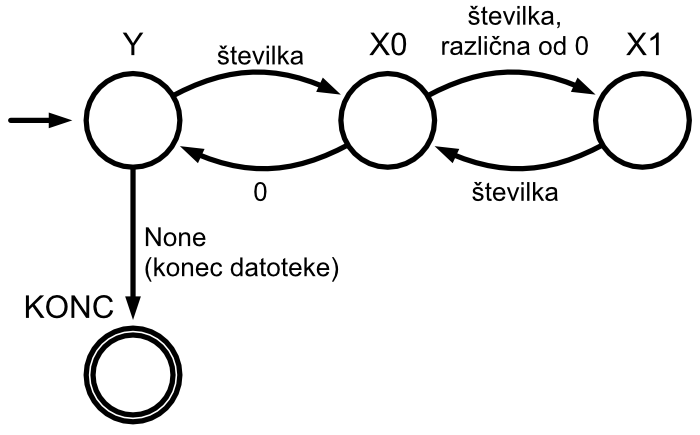

In [15]:
def preberi_b(ime_datoteke):
    f = open(ime_datoteke, "rb")
    ovire = {}

    Y, X0, X1, KONC = range(4)
    state = Y
    # Avtomat teče, dokler stanje ni KONC
    while state != KONC:
        # Preberemo naslednjo številko v `number`.
        # Če je datoteke konec, `bo number` vseboval `None`
        byte = f.read(1)
        if not byte:
            number = None
        else:
            number = byte[0]

        # Prvi krogec; gremo dol ali desno, odvisno od number
        if state == Y:
            if number == None:
                state = KONC
            else:
                y = number
                ovire[y] = []
                state = X0
        # Drugi; gremo levo (če 0, konec vrstice) ali desno
        elif state == X0:
            if number == 0:
                state = Y
            else:
                x0 = number
                state = X1
        # Tretji; zapišemo oviro in se vrnemo levo
        elif state == X1:
            ovire[y].append((x0, number))
            state = X0
    return ovire

Tule je rešitev, ki uporablja Pythonov `match`. O njem se nismo učili, vendar je podoben stavku `switch`, ki bi ga v drugih jezikih verjetno uproabili za programiranje končnih avtomatov.

In [16]:
import types
State = types.SimpleNamespace()
State.Y, State.X0, State.X1, State.End = range(4)

def preberi_b(ime_datoteke):
    ovire = {}
    f = open(ime_datoteke, "rb")
    stanje = State.Y
    while state != State.End:
        byte = f.read(1)
        b = byte and byte[0]
        match state:
            case State.Y:
                if not byte:
                    state = State.End
                else:
                    vrstica = ovire[b] = []
                    state = State.X0
            case State.X0:
                if b == 0:
                    state = State.Y
                else:
                    x0 = b
                    state = State.X1
            case State.X1:
                vrstica.append((x0, b))
                state = State.X0
    return ovire